<center><img src="https://www.analyticsvidhya.com/corporate/images/AV_logo_hires.png" width="240" height="100" /></center>

# <center>**Predicting Potential Customer**</center>

---
# **Table of Contents**
---

**1.** [**Problem Statement**](#Section1)<br>
**2.** [**Installing Libraries**](#Section2)<br>
**3.** [**Importing Libraries**](#Section3)<br>
**4.** [**Data Acquisition & Description**](#Section4)<br>
**5.** [**Exploratory Data Analysis**](#Section5)<br>
**6.** [**Make Data Model Ready**](#Section6)<br>
**7.** [**Model Building**](#Section7)<br>
**8.** [**Prediction on test data**](#Section8)<br>
**9.** [**Conclusion**](#Section9)<br>

---
<a name = Section1></a>
# **1. Problem Statement**
---

- A **D2C startup** develops products using cutting edge technologies like Web 3.0. Over the past few months, the company has started multiple marketing campaigns offline and digital both. As a result, the users have started showing interest in the product on the website. These users with **intent to buy** product(s) are generally known as leads **(Potential Customers**).

- **Direct leads** are captured via **forms embedded** in the website while **indirect leads** are captured based on certain **activity of a user** on the platform such as time spent on the website, number of user sessions, etc.

- Now, the marketing & sales team wants to identify the leads who are more likely to buy the product so that the sales team can manage their bandwidth efficiently by targeting these potential leads and increase the sales in a shorter span of time.



<center><img src="https://litextension.com/blog/wp-content/uploads/2020/11/10-Future-Ecommerce-Trends-to-Lock-in-Customers-in-2021Artboard-2-770x513.png" height= 400 width= 600 ></center>


###Objective
- The main objective of the problem  is to predict the propensity to buy a product based on the **user's past activities** and **user level information**.

###Evaluation Metric
- The evaluation metric for this hackathon is **F1 score**.

---
<a name = Section2></a>
# **2. Importing Libraries**
---

In [1]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.2f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once
#-------------------------------------------------------------------------------------------------------------------------------

from sklearn.model_selection import train_test_split                # train test split
from sklearn.model_selection import GridSearchCV                    # To find best pararmeters
from imblearn.over_sampling import  SMOTE                           # for imbalance data
from sklearn.preprocessing import StandardScaler                    # for feature scaling
#-------------------------------------------------------------------------------------------------------------------------------

from sklearn.linear_model import LogisticRegression                 # logistic regression
from sklearn.svm import SVC                                         # support vector 
from sklearn.tree import DecisionTreeClassifier                     # random forest
import lightgbm                                                     # LGBM 
from sklearn.ensemble import RandomForestClassifier                 # random forest 

#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.metrics import f1_score, roc_curve, precision_score, recall_score, confusion_matrix, auc          # metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


---
<a name = Section3></a>
# **3. Data Acquisition & Description**
---

In [2]:
train_data = pd.read_csv('train.csv')
print('Data Shape:', train_data.shape)
train_data.head()

Data Shape: (39161, 19)


,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.00,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.00,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.00,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.00,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0


**Observation:**
- There **19 columns** and **39161 rows** in **train data**.


In [3]:
train_data['buy'].value_counts()

0    37163
1     1998
Name: buy, dtype: int64

In [4]:
print('Customer who are going to buy:',1998/train_data.shape[0]*100,'%')
print('Customer who are not going to buy:',37163/train_data.shape[0]*100,'%')

Customer who are going to buy: 5.102014759582238 %
Customer who are not going to buy: 94.89798524041775 %


**Observation:**
- This is a case of highly imbalance dataset.

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39161 non-null  int64  
 1   created_at            39161 non-null  object 
 2   campaign_var_1        39161 non-null  int64  
 3   campaign_var_2        39161 non-null  int64  
 4   products_purchased    18250 non-null  float64
 5   signup_date           24048 non-null  object 
 6   user_activity_var_1   39161 non-null  int64  
 7   user_activity_var_2   39161 non-null  int64  
 8   user_activity_var_3   39161 non-null  int64  
 9   user_activity_var_4   39161 non-null  int64  
 10  user_activity_var_5   39161 non-null  int64  
 11  user_activity_var_6   39161 non-null  int64  
 12  user_activity_var_7   39161 non-null  int64  
 13  user_activity_var_8   39161 non-null  int64  
 14  user_activity_var_9   39161 non-null  int64  
 15  user_activity_var_1

In [6]:
train_data.columns

Index(['id', 'created_at', 'campaign_var_1', 'campaign_var_2',
       'products_purchased', 'signup_date', 'user_activity_var_1',
       'user_activity_var_2', 'user_activity_var_3', 'user_activity_var_4',
       'user_activity_var_5', 'user_activity_var_6', 'user_activity_var_7',
       'user_activity_var_8', 'user_activity_var_9', 'user_activity_var_10',
       'user_activity_var_11', 'user_activity_var_12', 'buy'],
      dtype='object')

**Observation:**
- From data itself we can see user activity features has only four or less categories. So we 12 features as categorical variables.


In [7]:
train_data['campaign_var_1'].value_counts()

6     4061
5     4060
4     4018
3     3784
7     3756
2     3486
8     3407
9     2866
10    2392
11    1873
1     1593
12    1455
13    1059
14     714
15     456
16     181
Name: campaign_var_1, dtype: int64

**Observation:**
- **campaign feature** is also a **categorical feature**.
- Our whole dataset is categorical excepts dates and id columns.

In [8]:
test_data = pd.read_csv('test.csv')
print('Data Shape:', test_data.shape)
test_data.head()

Data Shape: (13184, 18)


,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
0,39162,2022-01-01,2,2,NaN,2021-08-17,1,1,0,0,0,1,0,0,0,0,1,0
1,39163,2022-01-01,4,7,3.00,2020-05-21,1,0,0,0,0,0,0,1,0,0,0,0
2,39164,2022-01-01,8,7,NaN,NaN,0,0,0,0,1,1,0,0,0,0,0,0
3,39165,2022-01-01,9,8,2.00,2020-06-22,0,0,0,0,1,1,1,0,0,0,2,0
4,39166,2022-01-01,4,5,2.00,2021-03-10,1,0,0,0,0,0,0,0,0,0,0,0


**Observation:**
- There **18 columns** and **13184 rows** in **test data**.



---


#### *Lets check for unique values in columns:*

---



In [9]:
col_list= list(train_data.columns)

In [10]:
for col in col_list:
    print(col)
    print(train_data[col].unique())
    print('\n')

id
[    1     2     3 ... 39159 39160 39161]


created_at
['2021-01-01' '2021-01-02' '2021-01-03' '2021-01-04' '2021-01-05'
 '2021-01-06' '2021-01-07' '2021-01-08' '2021-01-09' '2021-01-10'
 '2021-01-11' '2021-01-12' '2021-01-13' '2021-01-14' '2021-01-15'
 '2021-01-16' '2021-01-17' '2021-01-18' '2021-01-19' '2021-01-20'
 '2021-01-21' '2021-01-22' '2021-01-23' '2021-01-24' '2021-01-25'
 '2021-01-26' '2021-01-27' '2021-01-28' '2021-01-29' '2021-01-30'
 '2021-01-31' '2021-02-01' '2021-02-02' '2021-02-03' '2021-02-04'
 '2021-02-05' '2021-02-06' '2021-02-07' '2021-02-08' '2021-02-09'
 '2021-02-10' '2021-02-11' '2021-02-12' '2021-02-13' '2021-02-14'
 '2021-02-15' '2021-02-16' '2021-02-17' '2021-02-18' '2021-02-19'
 '2021-02-20' '2021-02-21' '2021-02-22' '2021-02-23' '2021-02-24'
 '2021-02-25' '2021-02-26' '2021-02-27' '2021-02-28' '2021-03-01'
 '2021-03-02' '2021-03-03' '2021-03-04' '2021-03-05' '2021-03-06'
 '2021-03-07' '2021-03-08' '2021-03-09' '2021-03-10' '2021-03-11'
 '2021-03-12' '202

**Observation:**
- We saw for every col the unique but for product_purchase we **nan** values.
- Also for signup_date, we have to deep dive since it has many unique values.



---
#### *Checking for missing values*


---



In [11]:
train_data.isnull().sum()/train_data.shape[0]*100 # percentage of missing values in train_data:

id                      0.00
created_at              0.00
campaign_var_1          0.00
campaign_var_2          0.00
products_purchased     53.40
signup_date            38.59
user_activity_var_1     0.00
user_activity_var_2     0.00
user_activity_var_3     0.00
user_activity_var_4     0.00
user_activity_var_5     0.00
user_activity_var_6     0.00
user_activity_var_7     0.00
user_activity_var_8     0.00
user_activity_var_9     0.00
user_activity_var_10    0.00
user_activity_var_11    0.00
user_activity_var_12    0.00
buy                     0.00
dtype: float64

**Observation:**
- There are two features with missing values **signup_date** & **product_purchased**.

In [12]:
test_data.isnull().sum()/test_data.shape[0]*100 # percentage of missing values in train_data:

id                      0.00
created_at              0.00
campaign_var_1          0.00
campaign_var_2          0.00
products_purchased     61.71
signup_date            50.43
user_activity_var_1     0.00
user_activity_var_2     0.00
user_activity_var_3     0.00
user_activity_var_4     0.00
user_activity_var_5     0.00
user_activity_var_6     0.00
user_activity_var_7     0.00
user_activity_var_8     0.00
user_activity_var_9     0.00
user_activity_var_10    0.00
user_activity_var_11    0.00
user_activity_var_12    0.00
dtype: float64

**Observation:**
- Again in test data we two columns same as in train data which have missing values.



---


####*Let us explore the product_purchased with null values*


---



In [13]:
df = train_data[train_data['products_purchased'].isnull() ] # dataframe with null values of product_purchased

In [14]:
df['buy'].value_counts() # even when product_purchased was Null then also we had a lead 

0    19866
1     1045
Name: buy, dtype: int64

-  so we can fill the missing product_purchased column with median

In [15]:
# filling missing values in train and test data
train_data['products_purchased'].fillna(train_data['products_purchased'].median(), inplace = True)
test_data['products_purchased'].fillna(train_data['products_purchased'].median(), inplace = True)

In [16]:
# confirming if null values are filled
print(train_data['products_purchased'].isnull().sum() )
print(test_data['products_purchased'].isnull().sum() )

0
0




---


#### *Let us explore the signup_date with null values*


---



In [17]:
df2 = train_data[train_data['signup_date'].isnull() ] # dataframe with null values of signup_date

In [18]:
df2['buy'].value_counts()

0    15088
1       25
Name: buy, dtype: int64

In [19]:
# mode for signup_date train
train_data['signup_date'].mode()

0    2021-07-18
dtype: object

In [20]:
# mode for signup_date in test
test_data['signup_date'].mode()

0    2022-03-06
dtype: object

In [21]:
# filling missing value of signup with mode
train_data['signup_date'].fillna('2021-07-18', inplace = True)
test_data['signup_date'].fillna('2022-03-06', inplace = True)

In [22]:
# confirming if values are filled

print(train_data['signup_date'].isnull().sum() )
print(test_data['signup_date'].isnull().sum() )

0
0


In [23]:
# before moving forward lets change data type of dates in our train and test data to be datetime
train_data['created_at']= pd.to_datetime(train_data['created_at'])
train_data['signup_date'] = pd.to_datetime(train_data['signup_date'])


test_data['created_at'] = pd.to_datetime(test_data['created_at'])
test_data['signup_date'] = pd.to_datetime(test_data['signup_date'])

---
<a name = Section4></a>
# **4. Feature Engineering**
---

1. *The first feature we are going to add is difference in no of days when the customer signed_up and when lead was dropped.*

In [24]:
train_data['days_diff'] = train_data['created_at'] - train_data['signup_date']


In [25]:
train_data['days_diff'].head() 

0     99 days
1    104 days
2   -222 days
3   1185 days
4    207 days
Name: days_diff, dtype: timedelta64[ns]

In [26]:
#  since now it is in string format , we extracting days from the string
train_data['days_diff'] = train_data['days_diff'].apply(lambda x: int(str(x).split()[0]))

In [27]:
train_data['days_diff'].head()

0      99
1     104
2    -222
3    1185
4     207
Name: days_diff, dtype: int64

**Observation:**
- Negative days means people first signup in website then lead was generated, where as for +tve days it means lead was generated first then customer signed up.

In [28]:
# doing same for test data
test_data['days_diff'] = test_data['created_at'] - test_data['signup_date']

In [29]:
#  since now it is in string format , we extracting days from the string
test_data['days_diff'] = test_data['days_diff'].apply(lambda x: int(str(x).split()[0]))

Note - So we can create another feature called as lead_bef_sign means lead before signup.

2. *The 2nd &3rd feature we are going add is lead_bef_sign and signup month and day of week*

In [30]:
# we are going add 1 +tve days nd zero for - tve days
train_data['lead_bef_sign'] = np.where(train_data['days_diff']>0,1,0) 

In [31]:
# same for test data
test_data['lead_bef_sign'] = np.where(test_data['days_diff']>0,1,0) 

In [32]:
# for train data
train_data['month'] = train_data['signup_date'].dt.month
train_data['day_of_week'] = train_data['signup_date'].dt.dayofweek

In [33]:
# for test data
test_data['month'] = test_data['signup_date'].dt.month
test_data['day_of_week'] = test_data['signup_date'].dt.dayofweek

In [34]:
# now we can drop the signup date from our data since already used it for FE
train_data.drop('signup_date',axis=1,inplace=True)
test_data.drop('signup_date',axis=1,inplace=True)

3. The third & fourth feature would be lead month and lead week day which we will extract from feature created_at.

In [35]:
# for train data
train_data['lead_month'] = train_data['created_at'].dt.month
train_data['lead_day_of_week'] = train_data['created_at'].dt.dayofweek

In [36]:
# for test data
test_data['lead_month'] = test_data['created_at'].dt.month
test_data['lead_day_of_week'] = test_data['created_at'].dt.dayofweek

In [37]:
# dropping created_at feature
train_data.drop('created_at',axis=1,inplace=True)
test_data.drop('created_at',axis=1,inplace=True)

In [38]:
train_data.head()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,days_diff,lead_bef_sign,month,day_of_week,lead_month,lead_day_of_week
0,1,1,2,2.00,0,0,0,0,0,0,1,1,0,0,0,0,0,99,1,9,3,1,4
1,2,2,1,2.00,1,0,1,0,0,0,1,0,0,0,0,0,0,104,1,9,5,1,4
2,3,9,3,3.00,1,0,0,0,0,0,0,0,0,0,0,0,0,-222,0,8,2,1,4
3,4,6,7,2.00,0,0,0,0,0,0,0,0,0,0,0,0,0,1185,1,10,2,1,4
4,5,4,6,2.00,0,0,0,0,0,0,1,0,0,0,1,0,0,207,1,6,0,1,4




---
#### *Lets check corrleation among the features*


---




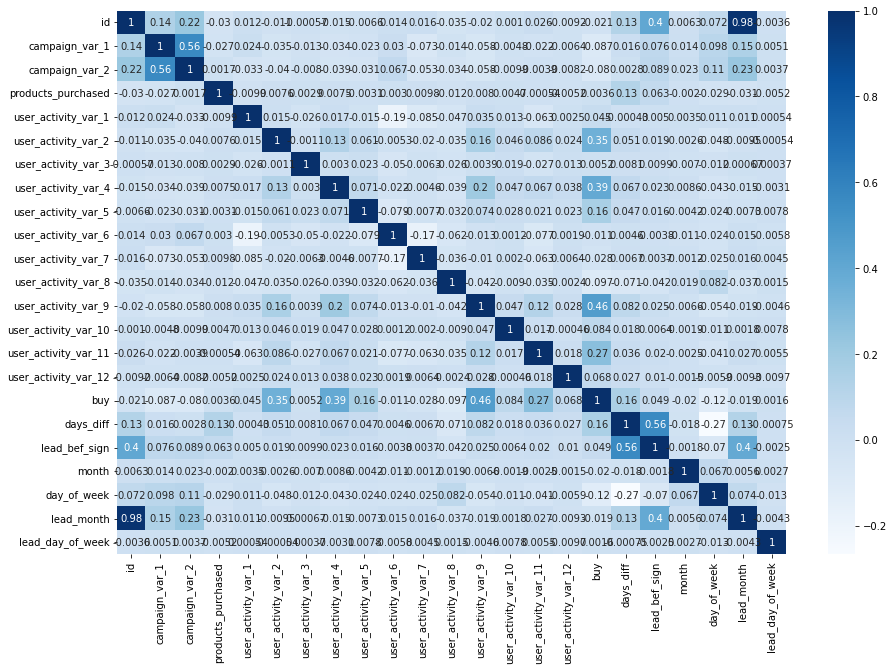

In [39]:
fig, ax = plt.subplots(figsize=(15,10))
corr = train_data.corr()
sns.heatmap(corr, cmap="Blues", annot=True) 

Observation:
- All the features are independent.

---
<a name = Section5></a>
# **5. Exploratory Data Analysis**
---

1. *How campaign information variable 1 is imp for potential cusomers?*

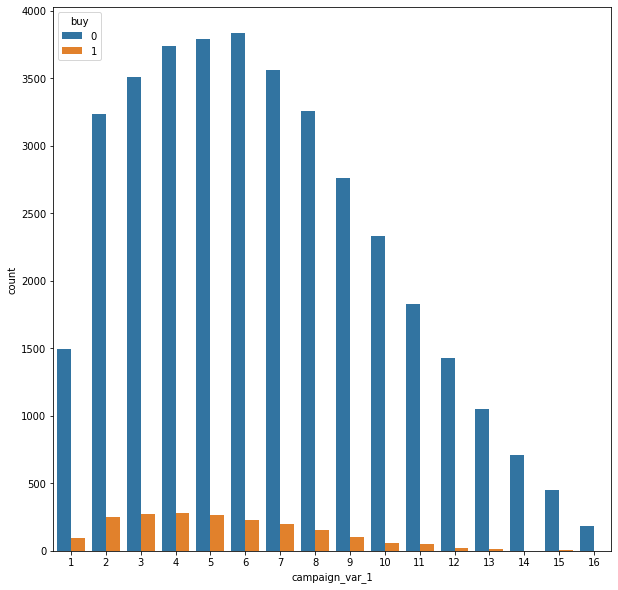

In [40]:
fig, ax = plt.subplots(figsize=(10,10));
sns.countplot(x="campaign_var_1", hue="buy", data=train_data);

Observation:
- From 1 to 10 in campaign info var 1 we can see there are potential customers.

2. *How campaign information variable 2 is imp for potetial cusomers?*

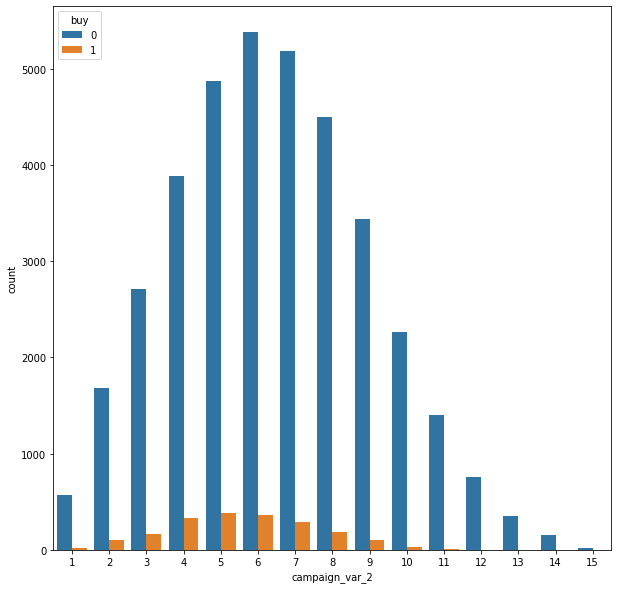

In [ ]:
fig, ax = plt.subplots(figsize=(10,10));
sns.countplot(x="campaign_var_2", hue="buy", data=train_data); 

Observation:
- From 2 to 9 in campaign info var 2 we can see there are potential customers.

3. *What do distribution of days diff tell us ?*

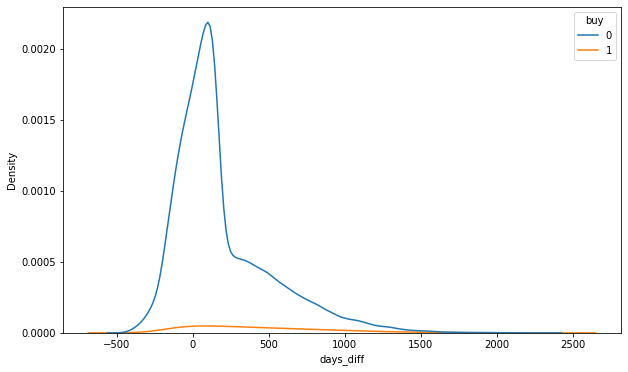

In [ ]:
plt.figure(figsize=(10,6)) ;

Observation:
- So positive days has higher no of potential customers?

4. *Do no of purchased product tells something about potential customers?*

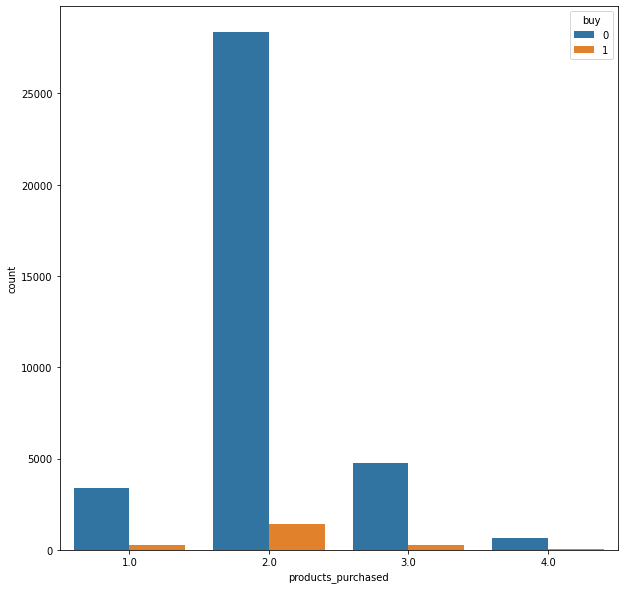

In [ ]:
fig, ax = plt.subplots(figsize=(10,10));
sns.countplot(x="products_purchased", hue="buy", data=train_data);

Observation:
- If we observe people with  product purchase has higher no of customers.

5. *Do leads dropping before signup affects customers?*

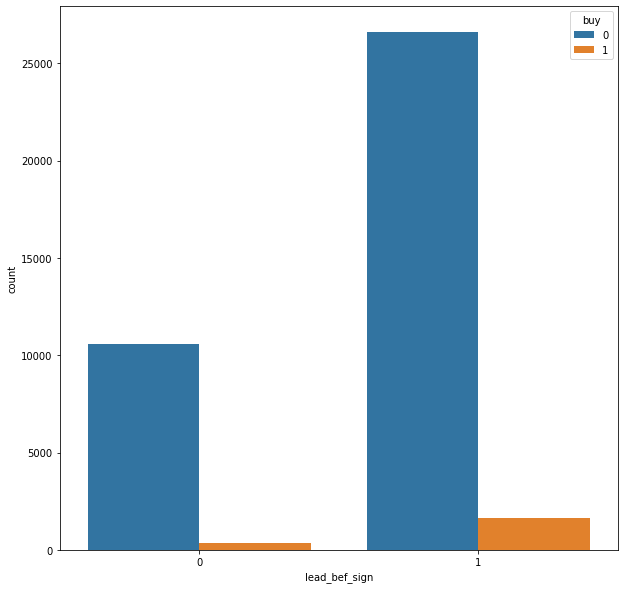

In [ ]:
fig, ax = plt.subplots(figsize=(10,10));
sns.countplot(x="lead_bef_sign", hue="buy", data=train_data);

**Observation:**
- The leads before sign has high no of customers buy.

6. *The no of user activity activity convert them into potential customers?*

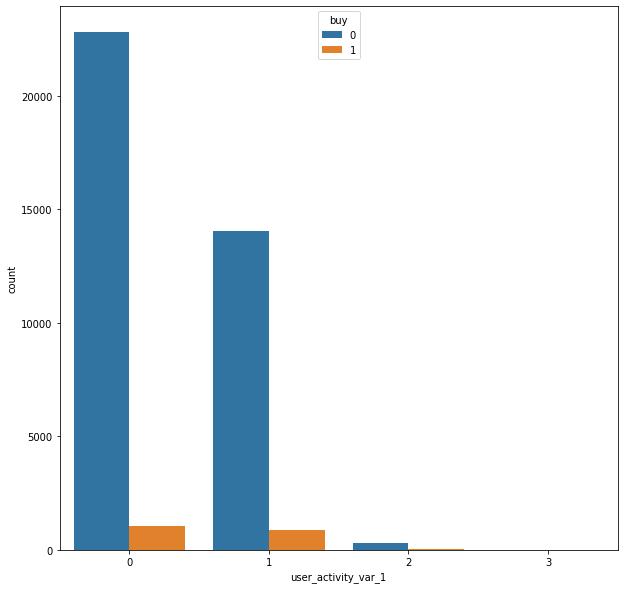

In [ ]:
fig, ax = plt.subplots(figsize=(10,10));
sns.countplot(x="user_activity_var_1", hue="buy", data=train_data);

**Observation:**
- The no of activity like 1 tell us about potential customers.

7. *Which months higher no of potential customers?*

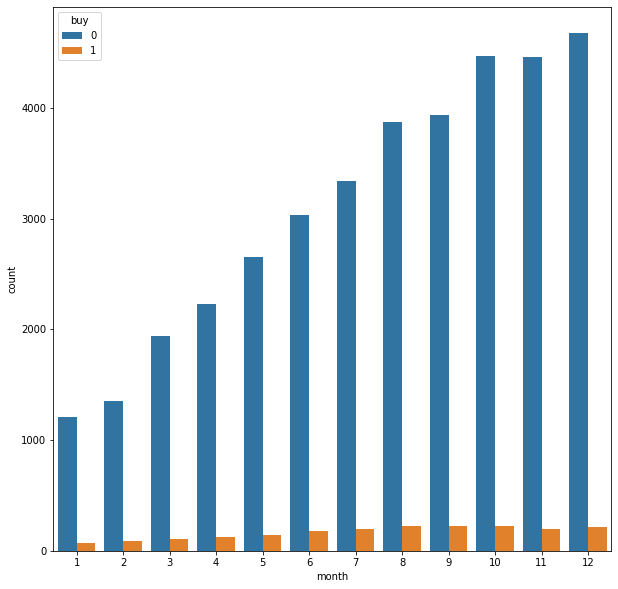

In [ ]:
fig, ax = plt.subplots(figsize=(10,10));
sns.countplot(x="month", hue="buy", data=train_data);

**Observation:**
- We can see the incresing trend of poteital customers as the month increase.

8. *Do you think day of the weekeends has more potential customers?*

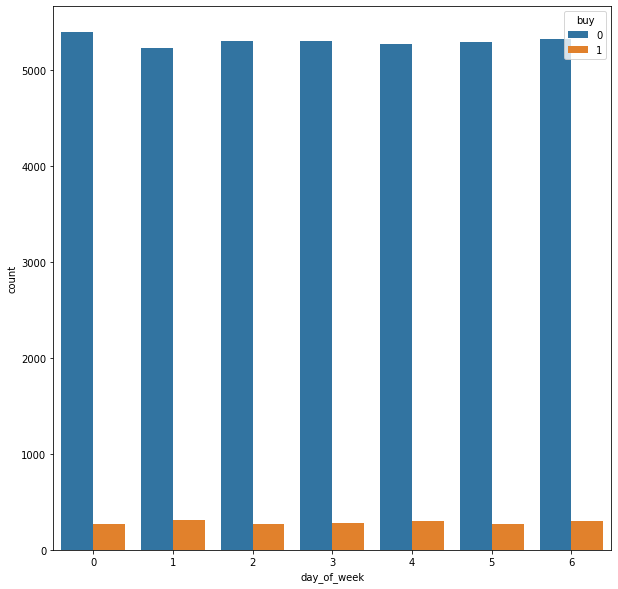

In [ ]:
fig, ax = plt.subplots(figsize=(10,10));
sns.countplot(x="day_of_week", hue="buy", data=train_data);

**Observation:**
- W.r.t  each day of week there are customers.

In [41]:
# saving our files
train_data.to_csv('train_final.csv', index=False)
test_data.to_csv('test_final.csv', index=False)

---
<a name = Section6></a>
# **6. Make Data Model Ready**
---

In [44]:
df = pd.read_csv('train_final.csv')
df.head()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,days_diff,lead_bef_sign,month,day_of_week,lead_month,lead_day_of_week
0,1,1,2,2.00,0,0,0,0,0,0,1,1,0,0,0,0,0,99,1,9,3,1,4
1,2,2,1,2.00,1,0,1,0,0,0,1,0,0,0,0,0,0,104,1,9,5,1,4
2,3,9,3,3.00,1,0,0,0,0,0,0,0,0,0,0,0,0,-222,0,8,2,1,4
3,4,6,7,2.00,0,0,0,0,0,0,0,0,0,0,0,0,0,1185,1,10,2,1,4
4,5,4,6,2.00,0,0,0,0,0,0,1,0,0,0,1,0,0,207,1,6,0,1,4


In [45]:
X =  df.drop(['id', 'buy'], axis=1)
Y = df['buy'].values

In [46]:
# train-test spliting
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)
print("Shape of train data: ", X_train.shape)
print("Shape of test data: ", X_test.shape)

Shape of train data:  (31328, 21)
Shape of test data:  (7833, 21)


In [47]:
# standardsing our data
scaler2 = StandardScaler()
X_train_scal = scaler2.fit_transform(X_train)
X_test_scal = scaler2.transform(X_test)

Utility function

In [42]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divide each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

---
<a name = Section7></a>
# **7. Model Building**
---

###7.1. Using Logistic Regression

In [48]:
c_range = np.logspace(-4, 4, 20)

clf = GridSearchCV(LogisticRegression(solver='liblinear',penalty='l1', max_iter=1000,class_weight='balanced'),
                   param_grid = {'C':c_range},
                   scoring='f1',
                   n_jobs=-1,cv=3)

clf.fit(X_train_scal, y_train)
print("Best F1 score obtained was: ", clf.best_score_)
best_log_model = clf.best_estimator_
print(best_log_model)

Best F1 score obtained was:  0.4095048557865833
LogisticRegression(C=0.004832930238571752, class_weight='balanced',
                   max_iter=1000, penalty='l1', solver='liblinear')


In [49]:
# Train and test predictions
y_train_pred = best_log_model.predict(X_train_scal)
y_test_pred = best_log_model.predict(X_test_scal)

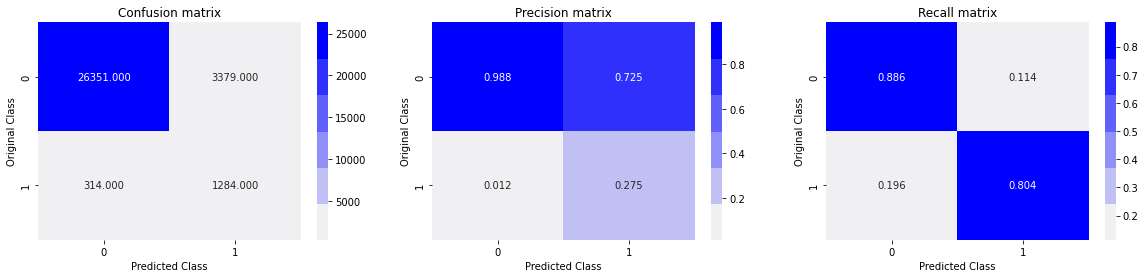

F1 score for train data:  0.4101581217057978
Recall for train data:  0.8035043804755945
Precision for train data:  0.2753592108084924


In [50]:
# Train Data Evaluation
plot_confusion_matrix(y_train, y_train_pred)
print("F1 score for train data: ", f1_score(y_train, y_train_pred))
print("Recall for train data: ", recall_score(y_train, y_train_pred))
print("Precision for train data: ", precision_score(y_train, y_train_pred))

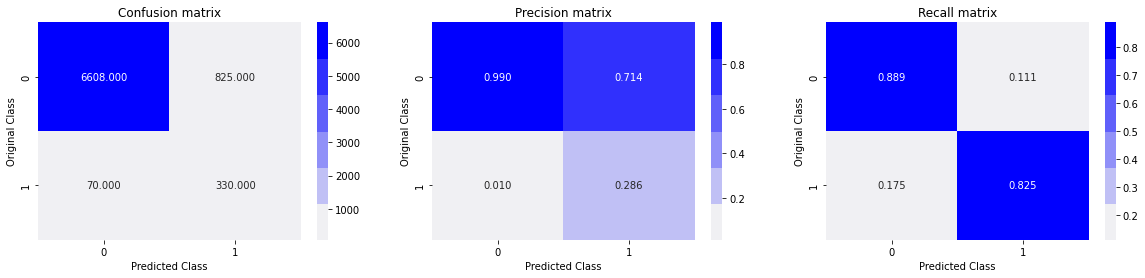

F1 score for test data:  0.4244372990353697
Recall for test data:  0.825
Precision for test data:  0.2857142857142857


In [51]:
# Test Data Evaluation
plot_confusion_matrix(y_test, y_test_pred)
print("F1 score for test data: ", f1_score(y_test, y_test_pred))
print("Recall for test data: ", recall_score(y_test, y_test_pred))
print("Precision for test data: ", precision_score(y_test, y_test_pred))

Observation:
- From the F1 score of test data we can see LR is giving only 0.42 score.

###7.2 Decision Tree

In [52]:
clf = GridSearchCV(DecisionTreeClassifier(class_weight='balanced'),
                   param_grid = {'max_depth': [2, 5, 15, 25, 50, 75, 100],
                                 'min_samples_split': [2, 3, 5, 7, 10],
                                 'min_samples_leaf': [1, 3, 5],
                                 'max_features': ['auto', 'sqrt', 'log2', 33]},
                   scoring='f1', verbose=1,
                   n_jobs=-1, cv=3)

clf.fit(X_train_scal, y_train)
print("Best F1 score obtained was: ", clf.best_score_)
tree_model = clf.best_estimator_
print(tree_model)

Fitting 3 folds for each of 420 candidates, totalling 1260 fits
Best F1 score obtained was:  0.5448779935450517
DecisionTreeClassifier(class_weight='balanced', max_depth=100,
                       max_features='log2')


In [53]:
# Train and test predictions
y_train_pred = tree_model.predict(X_train_scal)
y_test_pred = tree_model.predict(X_test_scal)

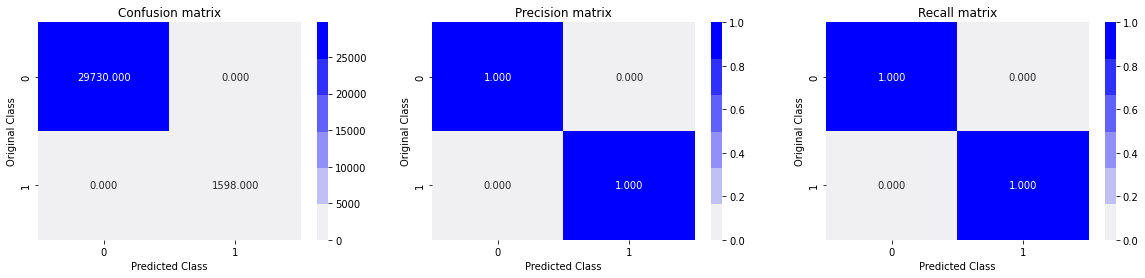

F1 score for train data:  1.0
Recall for train data:  1.0
Precision for train data:  1.0


In [54]:
# Train Data Evaluation
plot_confusion_matrix(y_train, y_train_pred)
print("F1 score for train data: ", f1_score(y_train, y_train_pred))
print("Recall for train data: ", recall_score(y_train, y_train_pred))
print("Precision for train data: ", precision_score(y_train, y_train_pred))

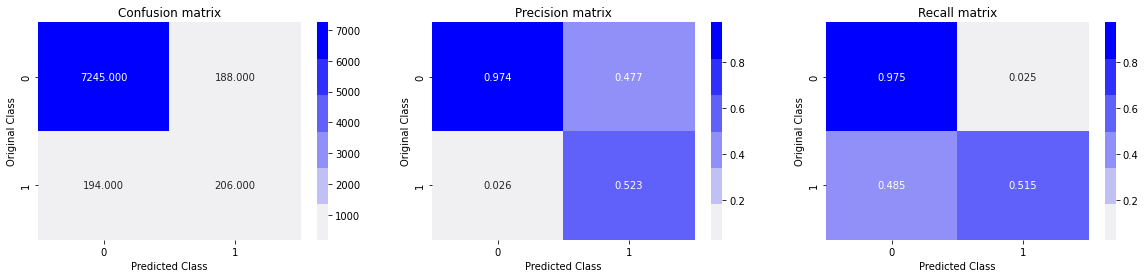

F1 score for test data:  0.5188916876574308
Recall for test data:  0.515
Precision for test data:  0.5228426395939086


In [55]:
# Test Data Evaluation
plot_confusion_matrix(y_test, y_test_pred)
print("F1 score for test data: ", f1_score(y_test, y_test_pred))
print("Recall for test data: ", recall_score(y_test, y_test_pred))
print("Precision for test data: ", precision_score(y_test, y_test_pred))

Observation:
- There is improvement in F1 score but  decision tree overfitting the data.

### 7.3. Random Forest

In [56]:
clf = GridSearchCV(RandomForestClassifier(class_weight='balanced'),
                   param_grid = {'n_estimators': [50, 100, 200, 300, 500, 1000],
                                 'max_depth': [5, 10, 50, None],
                                 'max_features': ['auto', 'sqrt', 'log2']},
                   scoring='f1', verbose=1,
                   n_jobs=-1, cv=3)

clf.fit(X_train_scal, y_train)
print("Best F1 score obtained was: ", clf.best_score_)   
forest_model = clf.best_estimator_ 
print(forest_model) 

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best F1 score obtained was:  0.6660759246762181
RandomForestClassifier(class_weight='balanced')


In [57]:
# Train and test predictions
y_train_pred = forest_model.predict(X_train_scal)
y_test_pred = forest_model.predict(X_test_scal)

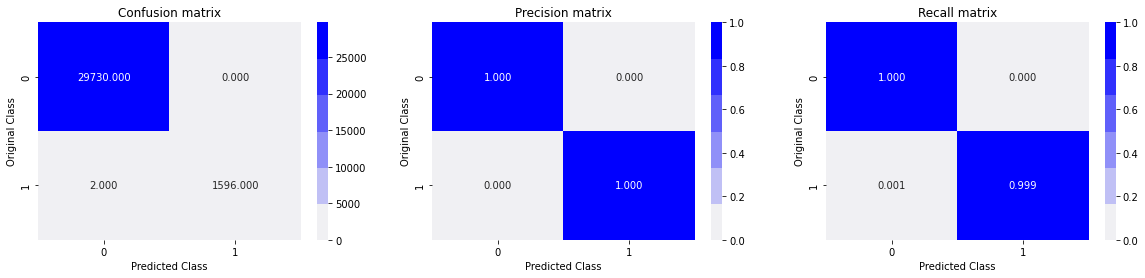

F1 score for train data:  0.9993738259236067
Recall for train data:  0.9987484355444305
Precision for train data:  1.0


In [58]:
# Train Data Evaluation
plot_confusion_matrix(y_train, y_train_pred)
print("F1 score for train data: ", f1_score(y_train, y_train_pred))
print("Recall for train data: ", recall_score(y_train, y_train_pred))
print("Precision for train data: ", precision_score(y_train, y_train_pred))

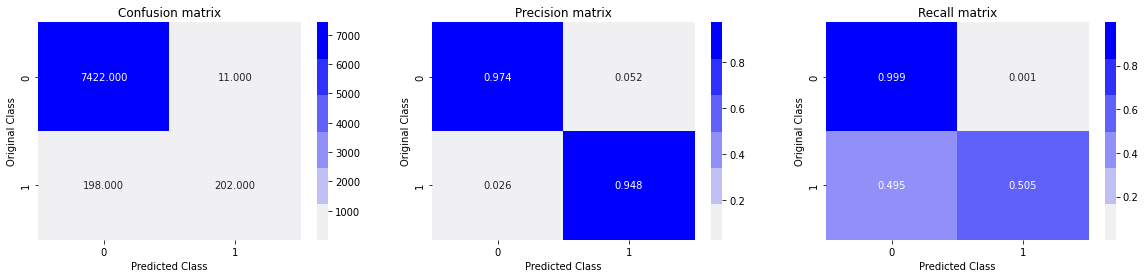

F1 score for test data:  0.6590538336052203
Recall for test data:  0.505
Precision for test data:  0.9483568075117371


In [59]:
# Test Data Evaluation
plot_confusion_matrix(y_test, y_test_pred)
print("F1 score for test data: ", f1_score(y_test, y_test_pred))
print("Recall for test data: ", recall_score(y_test, y_test_pred))
print("Precision for test data: ", precision_score(y_test, y_test_pred))

**Observation:**
- Using random forest there is big improvement in F1 score.

In [61]:
from joblib import dump, load
dump(forest_model, 'forest_model_1.joblib')
print("Model Saved successfully!")

Model Saved successfully!


### 7.4. Lightgbm

In [62]:
import lightgbm
clf = GridSearchCV(lightgbm.LGBMClassifier(class_weight='balanced'),
                   param_grid = {'learning_rate': [0.001, 0.002, 0.005, 0.1, 0.3, 0.5, 0.7],
                                 'n_estimators': [50, 100, 200, 300, 500]},
                   scoring='f1', verbose=1,
                   n_jobs=-1, cv=3)

clf.fit(X_train_scal, y_train)
print("Best F1 score obtained was: ", clf.best_score_)
gbdt_model = clf.best_estimator_
print(gbdt_model)

Fitting 3 folds for each of 35 candidates, totalling 105 fits
Best F1 score obtained was:  0.6651619221986587
LGBMClassifier(class_weight='balanced', learning_rate=0.5, n_estimators=500)


In [63]:
# Train and test predictions
y_train_pred = gbdt_model.predict(X_train_scal)
y_test_pred = gbdt_model.predict(X_test_scal)

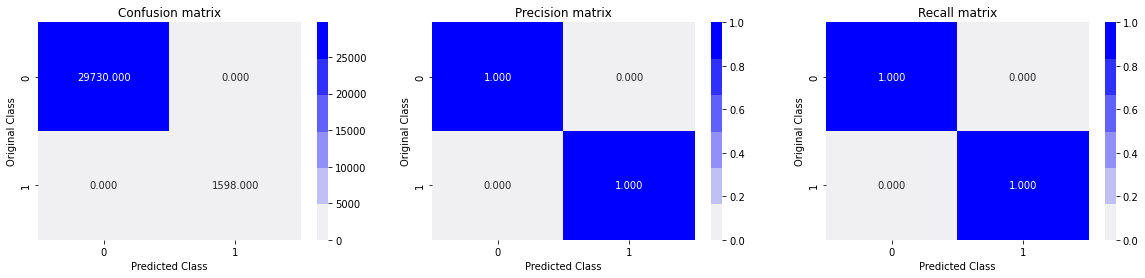

F1 score for train data:  1.0
Recall for train data:  1.0
Precision for train data:  1.0


In [64]:
# Train Data Evaluation
plot_confusion_matrix(y_train, y_train_pred)
print("F1 score for train data: ", f1_score(y_train, y_train_pred))
print("Recall for train data: ", recall_score(y_train, y_train_pred))
print("Precision for train data: ", precision_score(y_train, y_train_pred))

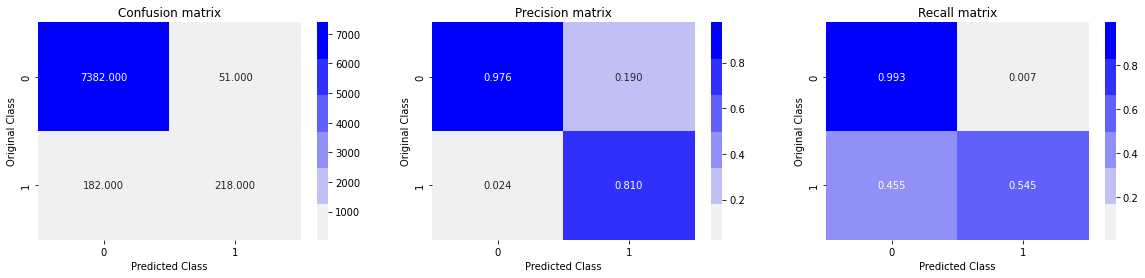

F1 score for test data:  0.6517189835575485
Recall for test data:  0.545
Precision for test data:  0.8104089219330854


In [65]:
# Test Data Evaluation
plot_confusion_matrix(y_test, y_test_pred)
print("F1 score for test data: ", f1_score(y_test, y_test_pred))
print("Recall for test data: ", recall_score(y_test, y_test_pred))
print("Precision for test data: ", precision_score(y_test, y_test_pred))

**Observation**:
- This model performance is good.


XGBoost

In [ ]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [66]:
import xgboost as xgb
clf = GridSearchCV(xgb.XGBClassifier(class_weight='balanced'),
                   param_grid = {'learning_rate': [0.001, 0.002, 0.005, 0.1, 0.3, 0.5, 0.7],
                                 'n_estimators': [50, 100, 200, 300, 500]},
                   scoring='f1', verbose=1,
                   n_jobs=-1, cv=3)

clf.fit(X_train_scal, y_train)
print("Best F1 score obtained was: ", clf.best_score_)
xgb_model = clf.best_estimator_
print(gbdt_model)

Fitting 3 folds for each of 35 candidates, totalling 105 fits
Best F1 score obtained was:  0.6905976883088246
LGBMClassifier(class_weight='balanced', learning_rate=0.5, n_estimators=500)


In [67]:
# Train and test predictions
y_train_pred = xgb_model.predict(X_train_scal)
y_test_pred = xgb_model.predict(X_test_scal)

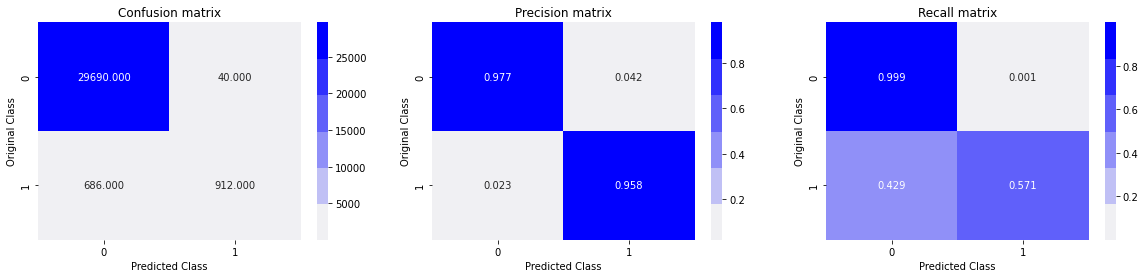

F1 score for train data:  0.7152941176470587
Recall for train data:  0.5707133917396746
Precision for train data:  0.957983193277311


In [68]:
# Train Data Evaluation
plot_confusion_matrix(y_train, y_train_pred)
print("F1 score for train data: ", f1_score(y_train, y_train_pred))
print("Recall for train data: ", recall_score(y_train, y_train_pred))
print("Precision for train data: ", precision_score(y_train, y_train_pred))

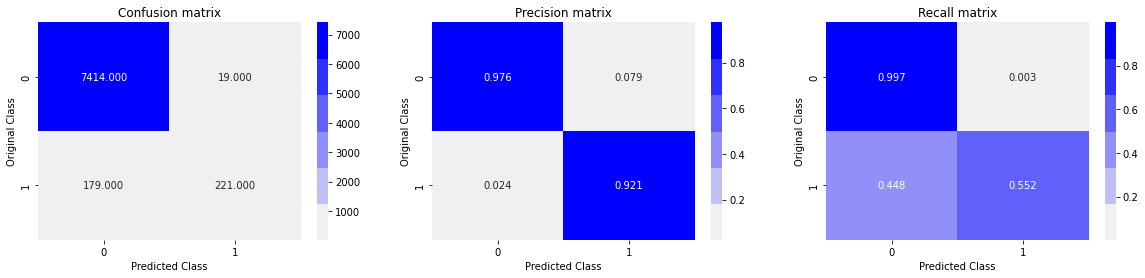

F1 score for test data:  0.690625
Recall for test data:  0.5525
Precision for test data:  0.9208333333333333


In [69]:
# Test Data Evaluation
plot_confusion_matrix(y_test, y_test_pred)
print("F1 score for test data: ", f1_score(y_test, y_test_pred))
print("Recall for test data: ", recall_score(y_test, y_test_pred))
print("Precision for test data: ", precision_score(y_test, y_test_pred))

In [71]:
from joblib import dump, load
dump(xgb_model, 'xgb_model_1.joblib')
print("Model Saved successfully!")

Model Saved successfully!


**Observation:**
- This the best model that have got so far.

#### Since random forest is my best, let's check the feature importance.
- Selecting top the features running the best model again.

In [72]:
# feature imp with RF
xgb_model.fit(X_train_scal, y_train)

feature_scores = pd.Series(xgb_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

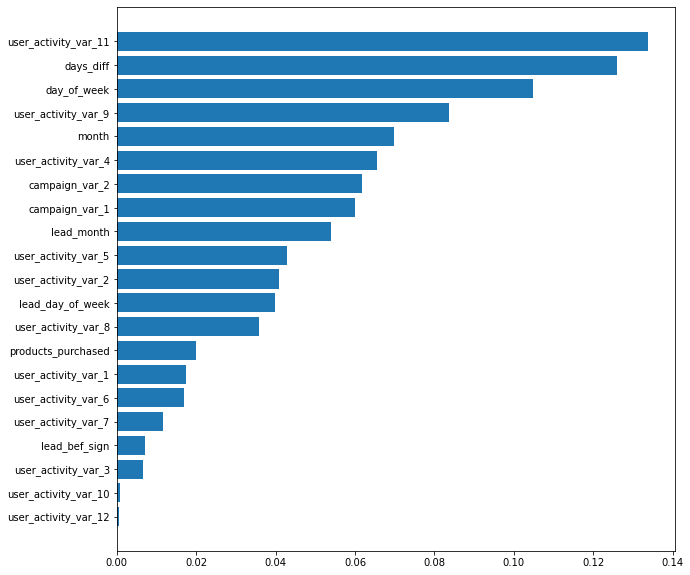

In [73]:
fig, ax = plt.subplots(figsize=(10,10));

f_i = list(zip(X_train.columns,forest_model.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

Observation:
- We can drop two columns user_activity_var_10 & 12.

In [74]:
df = pd.read_csv('train_final.csv')
df.head()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,days_diff,lead_bef_sign,month,day_of_week,lead_month,lead_day_of_week
0,1,1,2,2.00,0,0,0,0,0,0,1,1,0,0,0,0,0,99,1,9,3,1,4
1,2,2,1,2.00,1,0,1,0,0,0,1,0,0,0,0,0,0,104,1,9,5,1,4
2,3,9,3,3.00,1,0,0,0,0,0,0,0,0,0,0,0,0,-222,0,8,2,1,4
3,4,6,7,2.00,0,0,0,0,0,0,0,0,0,0,0,0,0,1185,1,10,2,1,4
4,5,4,6,2.00,0,0,0,0,0,0,1,0,0,0,1,0,0,207,1,6,0,1,4


In [75]:
df.drop(['user_activity_var_10', 'user_activity_var_12'], axis=1,inplace=True)

In [ ]:
#df.drop(['user_activity_var_3', 'lead_bef_sign'], axis=1,inplace=True)

In [76]:
df.head()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_11,buy,days_diff,lead_bef_sign,month,day_of_week,lead_month,lead_day_of_week
0,1,1,2,2.00,0,0,0,0,0,0,1,1,0,0,0,99,1,9,3,1,4
1,2,2,1,2.00,1,0,1,0,0,0,1,0,0,0,0,104,1,9,5,1,4
2,3,9,3,3.00,1,0,0,0,0,0,0,0,0,0,0,-222,0,8,2,1,4
3,4,6,7,2.00,0,0,0,0,0,0,0,0,0,0,0,1185,1,10,2,1,4
4,5,4,6,2.00,0,0,0,0,0,0,1,0,0,1,0,207,1,6,0,1,4


In [77]:
# dropping user activi
X =  df.drop(['id', 'buy'], axis=1)
Y = df['buy'].values

In [78]:
# train-test spliting
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=42)
print("Shape of train data: ", X_train.shape)
print("Shape of test data: ", X_test.shape)

Shape of train data:  (35244, 19)
Shape of test data:  (3917, 19)


In [79]:
# standardsing our data
scaler2 = StandardScaler()
X_train_scal = scaler2.fit_transform(X_train)
X_test_scal = scaler2.transform(X_test)

In [80]:
clf = GridSearchCV(xgb.XGBClassifier(class_weight='balanced'),
                   param_grid = {'learning_rate': [0.001, 0.002, 0.005, 0.1, 0.3, 0.5, 0.7],
                                 'n_estimators': [50, 100, 200, 300, 500]},
                   scoring='f1', verbose=1,
                   n_jobs=-1, cv=3)

clf.fit(X_train_scal, y_train)
print("Best F1 score obtained was: ", clf.best_score_)
xgb_model = clf.best_estimator_
print(gbdt_model)

Fitting 3 folds for each of 35 candidates, totalling 105 fits
Best F1 score obtained was:  0.6943788639213179
LGBMClassifier(class_weight='balanced', learning_rate=0.5, n_estimators=500)


In [81]:
# Train and test predictions
y_train_pred = xgb_model.predict(X_train_scal)
y_test_pred = xgb_model.predict(X_test_scal)

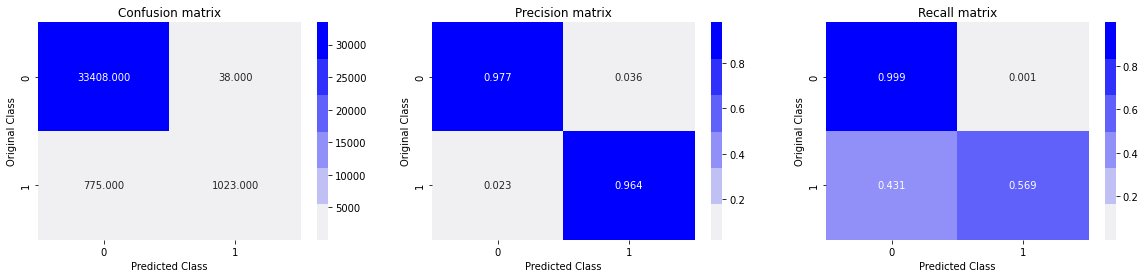

F1 score for train data:  0.7156348373557188
Recall for train data:  0.5689655172413793
Precision for train data:  0.9641847313854854


In [82]:
# Train Data Evaluation
plot_confusion_matrix(y_train, y_train_pred)
print("F1 score for train data: ", f1_score(y_train, y_train_pred))
print("Recall for train data: ", recall_score(y_train, y_train_pred))
print("Precision for train data: ", precision_score(y_train, y_train_pred))

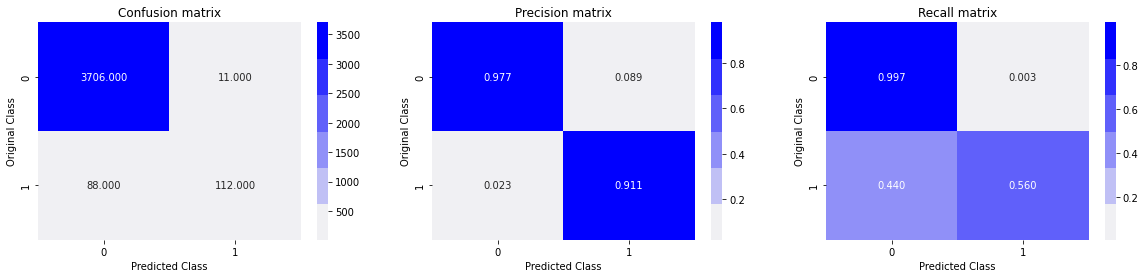

F1 score for test data:  0.6934984520123838
Recall for test data:  0.56
Precision for test data:  0.9105691056910569


In [83]:
# Test Data Evaluation
plot_confusion_matrix(y_test, y_test_pred)
print("F1 score for test data: ", f1_score(y_test, y_test_pred))
print("Recall for test data: ", recall_score(y_test, y_test_pred))
print("Precision for test data: ", precision_score(y_test, y_test_pred))

In [84]:
from joblib import dump, load
dump(xgb_model, 'xgb_model_2.joblib')
print("Model Saved successfully!")

Model Saved successfully!


**Observation:**
- After dropping less imp features we increased our F1 score and this the best model so far with the score of 0.6948

In [ ]:
# lets drop 2 more features and see the model performance


In [86]:
df = pd.read_csv('train_final.csv')
df.head()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,days_diff,lead_bef_sign,month,day_of_week,lead_month,lead_day_of_week
0,1,1,2,2.00,0,0,0,0,0,0,1,1,0,0,0,0,0,99,1,9,3,1,4
1,2,2,1,2.00,1,0,1,0,0,0,1,0,0,0,0,0,0,104,1,9,5,1,4
2,3,9,3,3.00,1,0,0,0,0,0,0,0,0,0,0,0,0,-222,0,8,2,1,4
3,4,6,7,2.00,0,0,0,0,0,0,0,0,0,0,0,0,0,1185,1,10,2,1,4
4,5,4,6,2.00,0,0,0,0,0,0,1,0,0,0,1,0,0,207,1,6,0,1,4


In [87]:
df.drop(['user_activity_var_10', 'user_activity_var_12','user_activity_var_3', 'lead_bef_sign'], axis=1,inplace=True)

In [88]:
df.head()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_11,buy,days_diff,month,day_of_week,lead_month,lead_day_of_week
0,1,1,2,2.00,0,0,0,0,0,1,1,0,0,0,99,9,3,1,4
1,2,2,1,2.00,1,0,0,0,0,1,0,0,0,0,104,9,5,1,4
2,3,9,3,3.00,1,0,0,0,0,0,0,0,0,0,-222,8,2,1,4
3,4,6,7,2.00,0,0,0,0,0,0,0,0,0,0,1185,10,2,1,4
4,5,4,6,2.00,0,0,0,0,0,1,0,0,1,0,207,6,0,1,4


In [89]:
# dropping user activi
X =  df.drop(['id', 'buy'], axis=1)
Y = df['buy'].values

In [90]:
# train-test spliting
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=42)
print("Shape of train data: ", X_train.shape)
print("Shape of test data: ", X_test.shape)

Shape of train data:  (35244, 17)
Shape of test data:  (3917, 17)


In [91]:
# standardsing our data
scaler2 = StandardScaler()
X_train_scal = scaler2.fit_transform(X_train)
X_test_scal = scaler2.transform(X_test)

In [93]:
clf = GridSearchCV(xgb.XGBClassifier(class_weight='balanced'),
                   param_grid = {'learning_rate': [0.001, 0.002, 0.005, 0.1, 0.3, 0.5, 0.7],
                                 'n_estimators': [50, 100, 200, 300, 500]},
                   scoring='f1', verbose=1,
                   n_jobs=-1, cv=3)

clf.fit(X_train_scal, y_train)
print("Best F1 score obtained was: ", clf.best_score_)
xgb_model = clf.best_estimator_
print(xgb_model)

Fitting 3 folds for each of 35 candidates, totalling 105 fits
Best F1 score obtained was:  0.6929372393339133
XGBClassifier(class_weight='balanced', learning_rate=0.3)


In [94]:
# Train and test predictions
y_train_pred = xgb_model.predict(X_train_scal)
y_test_pred = xgb_model.predict(X_test_scal)

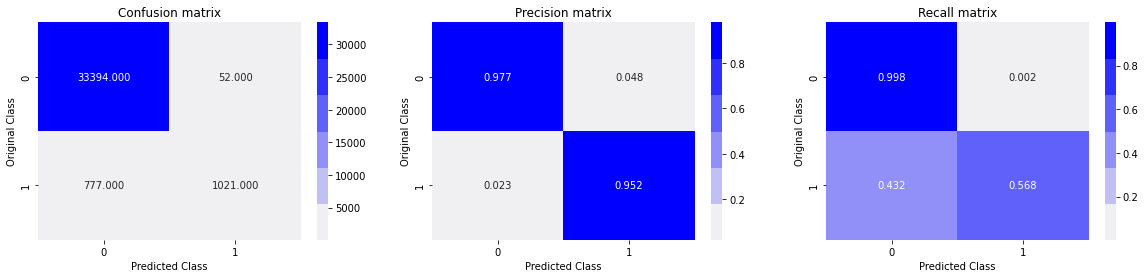

F1 score for train data:  0.7112504353883663
Recall for train data:  0.567853170189099
Precision for train data:  0.9515377446411929


In [95]:
# Train Data Evaluation
plot_confusion_matrix(y_train, y_train_pred)
print("F1 score for train data: ", f1_score(y_train, y_train_pred))
print("Recall for train data: ", recall_score(y_train, y_train_pred))
print("Precision for train data: ", precision_score(y_train, y_train_pred))

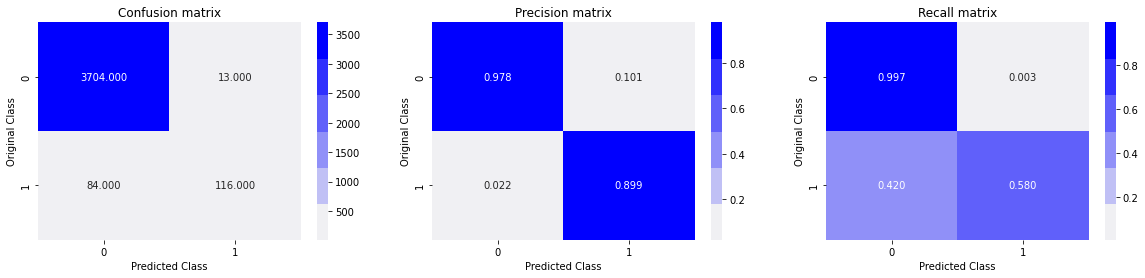

F1 score for test data:  0.7051671732522796
Recall for test data:  0.58
Precision for test data:  0.8992248062015504


In [96]:
# Test Data Evaluation
plot_confusion_matrix(y_test, y_test_pred)
print("F1 score for test data: ", f1_score(y_test, y_test_pred))
print("Recall for test data: ", recall_score(y_test, y_test_pred))
print("Precision for test data: ", precision_score(y_test, y_test_pred))

**Observation:**
- After drop 4 features we got our best model with f1 score of 0.70516

In [98]:
from joblib import dump, load
dump(xgb_model, 'xgb_model_3.joblib')
print("Model Saved successfully!")

Model Saved successfully!


In [ ]:
import joblib

In [ ]:
loaded_model = joblib.load('/content/drive/MyDrive/Colab Notebooks/Leads/xgb_model_3.joblib')

In [ ]:
print(loaded_model)

XGBClassifier(class_weight='balanced', missing=nan, n_estimators=500)


###Voting classifier

In [234]:
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB

clf1 = LogisticRegression(C=0.004832930238571752, class_weight='balanced',
                   max_iter=1000, penalty='l1', solver='liblinear')

clf2 = RandomForestClassifier(class_weight='balanced')

clf3 = lightgbm.LGBMClassifier(class_weight='balanced', learning_rate=0.5, n_estimators=500)

clf4 = xgb.XGBClassifier(class_weight='balanced', learning_rate=0.3)

In [235]:
eclf = VotingClassifier(estimators=[('LR',clf1),('RF', clf2),('XGB', clf4)],
                        voting='hard', weights=[1,1.5,2])
eclf.fit(X_train_scal, y_train)

VotingClassifier(estimators=[('LR',
                              LogisticRegression(C=0.004832930238571752,
                                                 class_weight='balanced',
                                                 max_iter=1000, penalty='l1',
                                                 solver='liblinear')),
                             ('RF',
                              RandomForestClassifier(class_weight='balanced')),
                             ('XGB',
                              XGBClassifier(class_weight='balanced',
                                            learning_rate=0.3))],
                 weights=[1, 1.5, 2])

In [236]:
# Train and test predictions
y_train_pred = eclf.predict(X_train_scal)
y_test_pred = eclf.predict(X_test_scal)

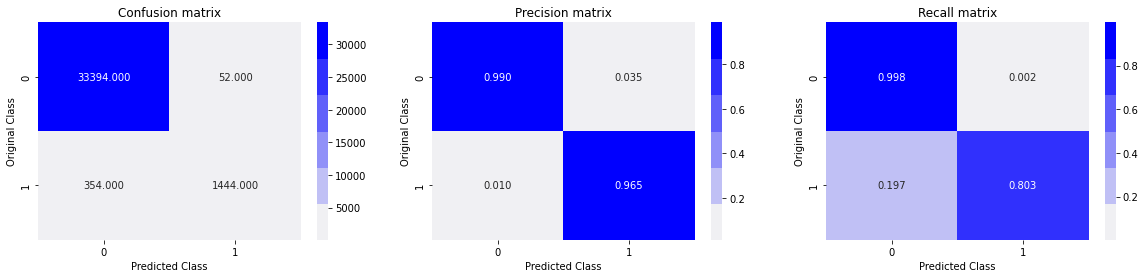

F1 score for train data:  0.8767455980570734
Recall for train data:  0.8031145717463849
Precision for train data:  0.9652406417112299


In [237]:
# Train Data Evaluation
plot_confusion_matrix(y_train, y_train_pred)
print("F1 score for train data: ", f1_score(y_train, y_train_pred))
print("Recall for train data: ", recall_score(y_train, y_train_pred))
print("Precision for train data: ", precision_score(y_train, y_train_pred))

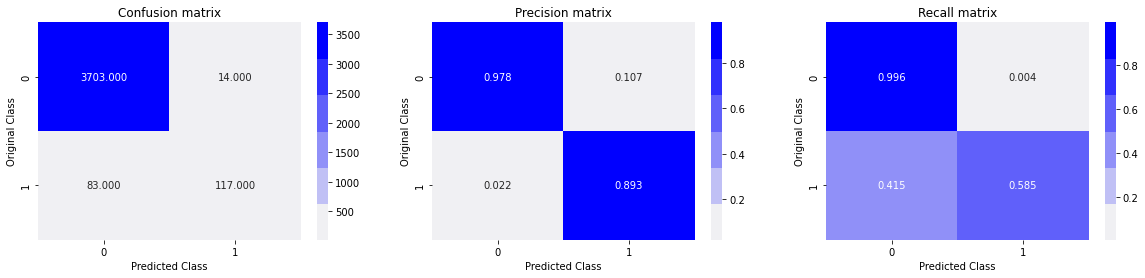

F1 score for test data:  0.7069486404833837
Recall for test data:  0.585
Precision for test data:  0.8931297709923665


In [238]:
# Test Data Evaluation
plot_confusion_matrix(y_test, y_test_pred)
print("F1 score for test data: ", f1_score(y_test, y_test_pred))
print("Recall for test data: ", recall_score(y_test, y_test_pred))
print("Precision for test data: ", precision_score(y_test, y_test_pred))

**Observation:**
- Using Voting classifier ensemble technique we got F1 score of 0.7069, which is best.

In [239]:
from joblib import dump, load
dump(eclf, 'eclf.joblib')
print("Model Saved successfully!")

Model Saved successfully!


---
<a name = Section8></a>
# **8. Prediction on Test**
---

In [244]:
df_test = pd.read_csv('test_final.csv')
df_test.head()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,days_diff,lead_bef_sign,month,day_of_week,lead_month,lead_day_of_week
0,39162,2,2,2.00,1,1,0,0,0,1,0,0,0,0,1,0,137,1,8,1,1,5
1,39163,4,7,3.00,1,0,0,0,0,0,0,1,0,0,0,0,590,1,5,3,1,5
2,39164,8,7,2.00,0,0,0,0,1,1,0,0,0,0,0,0,-64,0,3,6,1,5
3,39165,9,8,2.00,0,0,0,0,1,1,1,0,0,0,2,0,558,1,6,0,1,5
4,39166,4,5,2.00,1,0,0,0,0,0,0,0,0,0,0,0,297,1,3,2,1,5


In [245]:
df_test.drop(['user_activity_var_10', 'user_activity_var_12','user_activity_var_3', 'lead_bef_sign'], axis=1,inplace=True)

In [247]:
id = df_test['id']
df_test.drop('id',axis=1,inplace = True)

In [249]:
# standardsing our test_data
X_test = scaler2.transform(df_test)

In [241]:
loaded_model = joblib.load('eclf.joblib')

In [242]:
print(loaded_model)

VotingClassifier(estimators=[('LR',
                              LogisticRegression(C=0.004832930238571752,
                                                 class_weight='balanced',
                                                 max_iter=1000, penalty='l1',
                                                 solver='liblinear')),
                             ('RF',
                              RandomForestClassifier(class_weight='balanced')),
                             ('XGB',
                              XGBClassifier(class_weight='balanced',
                                            learning_rate=0.3, missing=nan))],
                 weights=[1, 1.5, 2])


In [250]:
y_pred = loaded_model.predict(X_test)

Making Submission file

In [252]:
sub={'id':id,'buy': y_pred}

submission = pd.DataFrame(sub)

In [255]:
submission.to_csv('submission.csv',index=False)